<a href="https://colab.research.google.com/github/KeuleUngaBunga/WP_DIFF_KI/blob/main/diff_01_aufgaben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einführung in Bildgenerierung mittels stable diffusion

Dieses Jupyter notebook dient als Startpunkt für die Nachbereitung der Vorlesung und gleichzeitig auch als Startpunkt für das Labor.


- erfordert sinnvollerweise einen Einsatz einer GPU
- zuvor zu installieren:
  - conda create -n diff python==3.12
  - conda activate diff
  - pytorch.com besuchen und Pytorch installieren
  - pip install jupyterlab, ipywidgets
  - pip install diffusers, accelerate, transformers, hf_xet

für Power-User noch einige Tipps hier:
https://huggingface.co/docs/diffusers/installation

Eine DiffusionPipeline ist eine Klasse der Bibliothek diffusers, die alle notwendigen Komponenten und Schritte enthält, um mit einem vortrainierten Diffusionsmodell Bilder (auch Audios/Videos) zu generieren.

**Aufgabe:** Erstelle eine DiffusionPipeline mit folgendem Code und analysiere die pipeline mittels ```help(pipeline)```.
  

In [ ]:
# Prüfen, ob PyTorch installiert ist und Kontrollieren der Version (mindestens 2.5.0 empfohlen)
import torch
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.8.0+cu126


In [ ]:
# Prüfen, ob GPU verfügbar ist
if torch.cuda.is_available():
    print("GPU is available.")
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("GPU is not available. Using CPU instead.")

GPU is not available. Using CPU instead.


In [ ]:
# Downgrade diffusers and transformers to compatible versions
!pip install diffusers==0.32.2 transformers==4.49

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.2
    Uninstalling diffusers-0.35.2:
      Successfully uninstalled diffusers-0.35.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


In [ ]:
# Pfad zum Speichern der 3 ... 5 GB grossen Modelle sinnvoll anpassen
#
# Hinweis Stand 8.10.25: Falls ein Fehler mit "...offset..." auftritt, bitte die diffusers und transformers Bibliothek downgraden:
# pip install diffusers==0.32.2 transformers==4.49
# dann jupyter notebook neu starten und den Code erneut ausführen.

from diffusers import DiffusionPipeline

cache_dir = "c:\\Users\\<USERNAME>\\Models"

pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    use_safetensors=True,
    cache_dir=cache_dir
    )

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
help(pipeline)

Help on StableDiffusionPipeline in module diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion object:

class StableDiffusionPipeline(diffusers.pipelines.pipeline_utils.DiffusionPipeline, diffusers.pipelines.pipeline_utils.StableDiffusionMixin, diffusers.loaders.textual_inversion.TextualInversionLoaderMixin, diffusers.loaders.lora_pipeline.StableDiffusionLoraLoaderMixin, diffusers.loaders.ip_adapter.IPAdapterMixin, diffusers.loaders.single_file.FromSingleFileMixin)
 |  StableDiffusionPipeline(vae: diffusers.models.autoencoders.autoencoder_kl.AutoencoderKL, text_encoder: transformers.models.clip.modeling_clip.CLIPTextModel, tokenizer: transformers.models.clip.tokenization_clip.CLIPTokenizer, unet: diffusers.models.unets.unet_2d_condition.UNet2DConditionModel, scheduler: diffusers.schedulers.scheduling_utils.KarrasDiffusionSchedulers, safety_checker: diffusers.pipelines.stable_diffusion.safety_checker.StableDiffusionSafetyChecker, feature_extractor: transformers.models.clip.ima

In [ ]:
print(pipeline)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



## Erstellen eines Bildes

1. ohne Nutzung einer GPU
2. mit Nutzung einer GPU

In [ ]:
'''
prompt = "cute cat with a hat"
pipeline.to("cpu")
image = pipeline(prompt).images[0]
display(image)
'''

'\nprompt = "cute cat with a hat"\npipeline.to("cpu")\nimage = pipeline(prompt).images[0]\ndisplay(image)\n'

Laufzeit ohne GPU: 22min 01s


In [ ]:
'''
pipeline.to("cuda")
image = pipeline(prompt).images[0]
display(image)
'''

'\npipeline.to("cuda")\nimage = pipeline(prompt).images[0]\ndisplay(image)\n'

Laufzeit mit GPU: 22s

## TODO

Hierauf aufbauend bitte mit Konfigurationsmöglichkeiten und der Funktionsweise der Pipeline vertraut machen.

Die Kernfrage lautet: Wie kann die Bildgenerierung beschleunigt werden?

  0%|          | 0/10 [00:00<?, ?it/s]

Image generation with 10 took 7.106 seconds


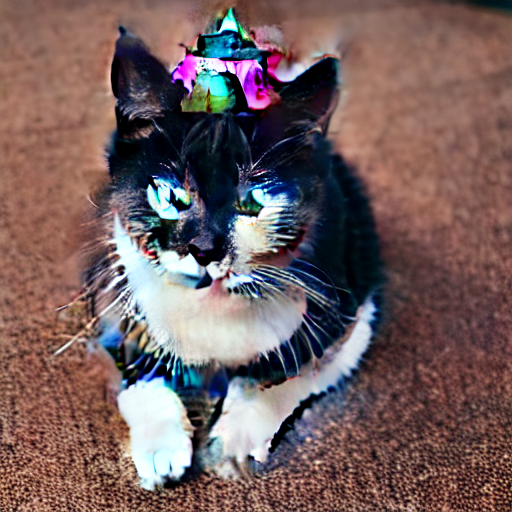

  0%|          | 0/25 [00:00<?, ?it/s]

Image generation with 25 took 12.263 seconds


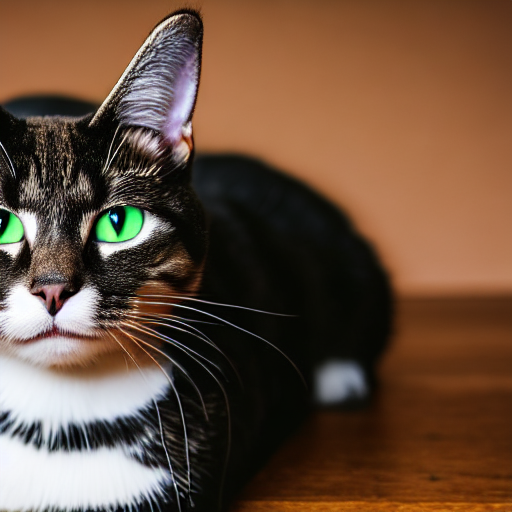

  0%|          | 0/50 [00:00<?, ?it/s]

Image generation with 50 took 24.112 seconds


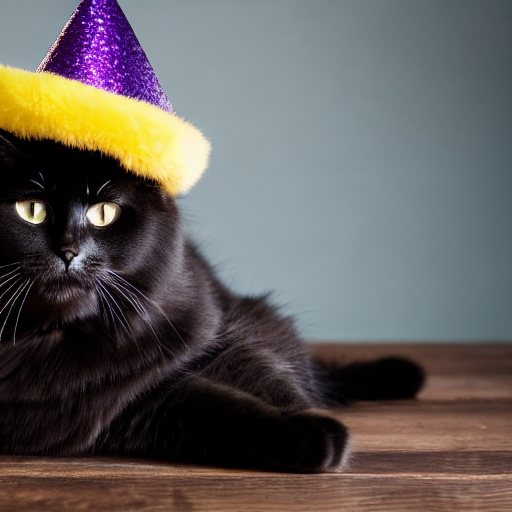

  0%|          | 0/75 [00:00<?, ?it/s]

Image generation with 75 took 35.962 seconds


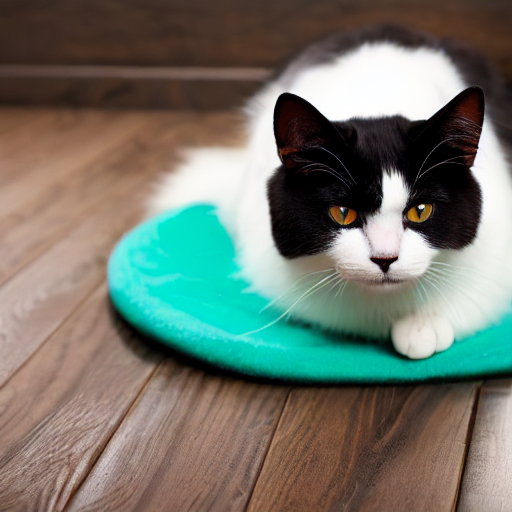

  0%|          | 0/100 [00:00<?, ?it/s]

Image generation with 100 took 48.007 seconds


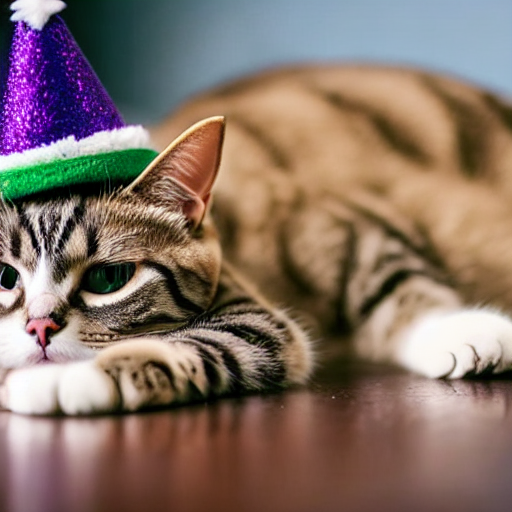

,steps_gpu,time_gpu
0,10,7.105904
1,25,12.263448
2,50,24.112241
3,75,35.961995
4,100,48.007148


In [ ]:
import time
import numpy as np
import pandas as pd

#prompt und neg prompt und Nutzung der Grafikkarte
#prompt="A photo of a tall green imposing alien, with vey long limbs, with big black eyes, at night in a forest, full body shot, focus on the alien, realistic, 4k, photo, real, dark"
prompt="A photo of a cat with black and white fur, with green eyes and wearing a purple party hat on its head, laying on a brown wooden table, full body shot, focus on the cat, realistic, 4k, photo, real, cozy"
negative_prompt="drawing, Artwork, Painting, Morphing"
pipeline.to("cuda")

#Funktion für Zeitmessung mit verschiedener Anzahl von steps
def get_time_and_pic(steps):
  start_time = time.perf_counter()
  image = pipeline(prompt,negative_prompt=negative_prompt,num_inference_steps=steps).images[0]
  end_time = time.perf_counter()
  print(f"Image generation with {steps} took {end_time - start_time:.3f} seconds")
  display(image)
  return (end_time-start_time)

#Arrays für step und time values
step_vals=np.array([10,25,50,75,100])
#time_vals=np.array()
time_vals=[]

#testing
for steps in step_vals:
  temp=get_time_and_pic(steps)
  time_vals.append(temp)

#pandas table
table=pd.DataFrame({"steps_gpu":step_vals,"time_gpu":time_vals})
display(table)

# Auffälligkeiten -- img gen mit txt2img:

## 10 steps:
Schlechte Qualität, verzerrtes Bild

## 25 steps:
Gute Qualität, wenig prompt adherence, aber main-focus, z.b. Katze ist gut erkennbar

##50 steps:
Bessere Qualität als mit 25, ansonsten ähnlich

## 75 steps:
Beste prompt-adherence, details wie z.b. purple hat werden miteinbezogen

## 100 steps:
Wieder schlechter als mit 75 steps, z.b. hut ist zwar da, aber nicht auf der katze oder die Augeen shen verzerrt aus

TODO:pandas table mit vergleich, auch für gen mit cpu



In [ ]:
#Zeitmessung mit cpu, aufbauend auf die vorherige code zelle

pipeline.to("cpu")
table_cpu=table

#Arrays für step und time values
step_vals_cpu=np.array([25,75])
time_vals_cpu={}

#testing
for steps in step_vals_cpu:
  temp=get_time_and_pic(steps)
  time_vals_cpu.update({steps:temp})

#pandas table cpu werte eintragen, nur vergleichbare werte werden verwendet
for key, val  in time_vals_cpu.items():
  table_cpu.loc[table_cpu["steps_gpu"] == key, "time_cpu"] = val
display(table_cpu)


NameError: name 'table' is not defined

In [ ]:
from diffusers import DiffusionPipeline
from diffusers.utils import load_image
# Img2Img
'''
#img2img test
pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)
pipeline.to("cuda")
#img und prompts
init_image = load_image("https://t3.ftcdn.net/jpg/05/66/35/06/360_F_566350631_5ad7VJe5C8ZJj3NNc3AXXFQq7MuIylM6.jpg")
prompt = "A black lamborghini in an Anime style, detailed, comic, anime, manga, drawing, Art"
negative_prompt="Morphing, ugly, unreal"
#output
print("mit img:")
image = pipeline(prompt,negative_prompt=negative_prompt,num_inference_steps=25, image=init_image).images[0]
display(image)
print("ohne img:")
image = pipeline(prompt,negative_prompt=negative_prompt,num_inference_steps=25).images[0]
display(image)
'''

# Img2img Runtime:
Beispiel img2 img ohne gpu aus dem Tutorial hatte mit 25 steps 13min gebraucht, also vergleichbar mit text2img

mit gpu brauchte img2img mit 25 steps nur 11s

# Gedanken:

img2img mit prompt, nimmt den prompt stark ins Gewicht, ich bin mir nicht sicher was das Input Bild überhaupt bewirkt, außer von dem Prompt abzulenken

wirkt nicht sehr sinnvoll

Stiländerungen scheinen gut zu funktionieren(auch nicht direkt), aber verschiedene Stile gehen auch ohne Input Bild